# Playstore Live Project 2023

## Data Cleaning and Exploratory Data Analysis

### Import Modules and Data Review

#### Loading Modules

In [73]:
# Libraries
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
from skimpy import clean_columns, skim

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

# Figure and display options
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style('whitegrid')

#### 'Apps' Data

In [74]:
# loading data from 'apps' file
df1 = pd.read_csv('playstore_apps.csv', index_col="App")

df1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159.000,19M,10000.000,Free,0.000,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.900,967.000,14M,500000.000,Free,0.000,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700,87510.000,8.7M,5000000.000,Free,0.000,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644.000,25M,50000000.000,Free,0.000,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967.000,2.8M,100000.000,Free,0.000,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [75]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

> Need to edit column names

In [76]:
df1 = clean_columns(df1)
df1.sample(3)

12 column names have been cleaned

,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
App,,,,,,,,,,,,
CD COMET,MAPS_AND_NAVIGATION,4.300,12.000,2.6M,100.000,Free,0.000,Everyone,Maps & Navigation,04-08-2018,4,4.1 and up
Meritrust CU Mobile Banking,FINANCE,4.700,3661.000,14M,50000.000,Free,0.000,Everyone,Finance,12-06-2018,5.9.1.0,5.0 and up
"SKOUT - Meet, Chat, Go Live",SOCIAL,4.300,1064076.000,Varies with device,50000000.000,Free,0.000,Mature 17+,Social,28-07-2018,Varies with device,Varies with device


In [77]:
df1.columns

Index(['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price',
       'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        10841 non-null  object 
 1   rating          9367 non-null   float64
 2   reviews         10840 non-null  float64
 3   size            10841 non-null  object 
 4   installs        10840 non-null  float64
 5   type            10840 non-null  object 
 6   price           10840 non-null  float64
 7   content_rating  10840 non-null  object 
 8   genres          10841 non-null  object 
 9   last_updated    10840 non-null  object 
 10  current_ver     10833 non-null  object 
 11  android_ver     10838 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


#### Handling Duplicates

In [79]:
# checking for duplicates
df1.duplicated().value_counts()

False    10349
True       492
dtype: int64

In [80]:
# dropping duplicates
df1.drop_duplicates(keep='first', inplace=True)

In [81]:
# shape of dataframe after removing duplicates
df1.shape

(10349, 12)

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        10349 non-null  object 
 1   rating          8891 non-null   float64
 2   reviews         10348 non-null  float64
 3   size            10349 non-null  object 
 4   installs        10348 non-null  float64
 5   type            10348 non-null  object 
 6   price           10348 non-null  float64
 7   content_rating  10348 non-null  object 
 8   genres          10349 non-null  object 
 9   last_updated    10348 non-null  object 
 10  current_ver     10341 non-null  object 
 11  android_ver     10346 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.0+ MB


#### Handling Irrelevant Values

In [83]:
df1.columns

Index(['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price',
       'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [84]:
#'category' column 
df1.category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

> '1.9' is irrelevant

In [85]:
df1[df1["category"] == '1.9']

,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


> Single entry, good to drop

In [86]:
# locating index
df1[df1["category"] == '1.9'].index[0]

'Life Made WI-Fi Touchscreen Photo Frame'

In [87]:
df1.drop(df1[df1["category"] == '1.9'].index[0], inplace=True)

In [88]:
# checking if the irrelevant values are removed
df1.category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [89]:
df1.rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

> No irrelevant values

In [90]:
df1.reviews.unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

> No irrelevant values

In [91]:
df1["size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [92]:
df1["size"].sample(3)

App
Hot Bhojpuri Video Song 2018 - Free Movies    3.7M
Alabama Road Trips                             28M
SCI-FI UI                                     3.9M
Name: size, dtype: object

> No irrelevant values

In [93]:
df1.installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [94]:
df1.installs.sample(3)

App
Es-Bg Offline Voice Translator                   10.000
AVG AntiVirus 2018 for Android Security   100000000.000
AU Students Zone (Result 2016)                10000.000
Name: installs, dtype: float64

> No irrelevant values

In [95]:
df1["type"].unique()

array(['Free', 'Paid', nan], dtype=object)

> No irrelevant values

In [96]:
df1.price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [97]:
df1.price.dtype

dtype('float64')

In [98]:
df1.price.sample(3)

App
Morse Player Free                                    0.000
Breaking News, Local news, Attacks and Alerts Free   0.000
ES Summer Chill Theme for Free                       0.000
Name: price, dtype: float64

> No irrelevant values

In [99]:
df1.columns

Index(['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price',
       'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [100]:
df1.content_rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

> No irrelevant values

In [101]:
df1.genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

> No irrelevant values

In [102]:
df1.columns

Index(['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price',
       'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [103]:
df1.last_updated.unique()

array(['07-01-2018', '15-01-2018', '01-08-2018', ..., '20-01-2014',
       '16-02-2014', '23-03-2014'], dtype=object)

In [104]:
df1.last_updated.sample(3)

App
Sabka Malik Ek Sai              25-05-2013
Multiling O Keyboard + emoji    03-07-2018
P Icon Pack                     16-07-2018
Name: last_updated, dtype: object

> No irrelevant values

In [105]:
df1.current_ver.unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [106]:
df1.current_ver.sample(3)

App
Easy and Fast Recipes     3.0.1
Walmart MoneyCard        1.14.1
Marcus Theatres          2.9.43
Name: current_ver, dtype: object

> No irrelevant values

In [107]:
df1.android_ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

> No irrelevant values

#### 'Reviews' Data

In [108]:
# loading data from 'reviews' file
df2 = pd.read_csv('playstore_reviews.csv', index_col="App")

df2.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.000,0.533
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250,0.288
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.400,0.875
10 Best Foods for You,Best idea us,Positive,1.000,0.300


> Need to edit column names

In [109]:
df2 = clean_columns(df2)
df2.sample(3).T

4 column names have been cleaned

App,"CBS Sports App - Scores, News, Stats & Watch Live",Food Calorie Calculator,Google Handwriting Input
translated_review,This huge let down. I try watch year crossfit games fails always. It fails worst possible time. CBS disappointment.,Disgusting app... won't install,Good
sentiment,Negative,Negative,Positive
sentiment_polarity,-0.337,-1.000,0.700
sentiment_subjectivity,0.598,1.000,0.600


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64295 entries, 10 Best Foods for You to Houzz Interior Design Ideas
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   translated_review       37427 non-null  object 
 1   sentiment               37432 non-null  object 
 2   sentiment_polarity      37432 non-null  float64
 3   sentiment_subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.5+ MB


#### Handling Duplicates

In [111]:
# checking for duplicates
df2.duplicated().value_counts()

True     36299
False    27996
dtype: int64

In [112]:
# dropping duplicates
df2.drop_duplicates(keep='first', inplace=True)

In [113]:
# shape of dataframe after removing duplicates
df2.shape

(27996, 4)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27996 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   translated_review       27994 non-null  object 
 1   sentiment               27995 non-null  object 
 2   sentiment_polarity      27995 non-null  float64
 3   sentiment_subjectivity  27995 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


#### Handling Irrelevant Values

In [115]:
df2.columns

Index(['translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')

In [44]:
df2.translated_review.unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [117]:
df2.translated_review.sample(3).T

App
Divar                                                                                                                                         To Mr. Rouhani, you will have a 6.7-year genocide recorded in the history of mankind.
Google                      Google Assistant broken. Both"OK Google" "Hey Google" used work fine sudden completely unresponsive. Voice commands worked I manually opened assistant hotwords nothing. The option Access Voice Mat...
Brightest LED Flashlight                                                                                                                                                     Great flashlite sos feature blinking light. Great work
Name: translated_review, dtype: object

In [118]:
df2.translated_review.describe().T

count                                                                                                                          27994
unique                                                                                                                         27994
top       I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
freq                                                                                                                               1
Name: translated_review, dtype: object

> No irrelevant values

In [119]:
df2.sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [120]:
df2.sentiment.describe()

count        27995
unique           3
top       Positive
freq         17593
Name: sentiment, dtype: object

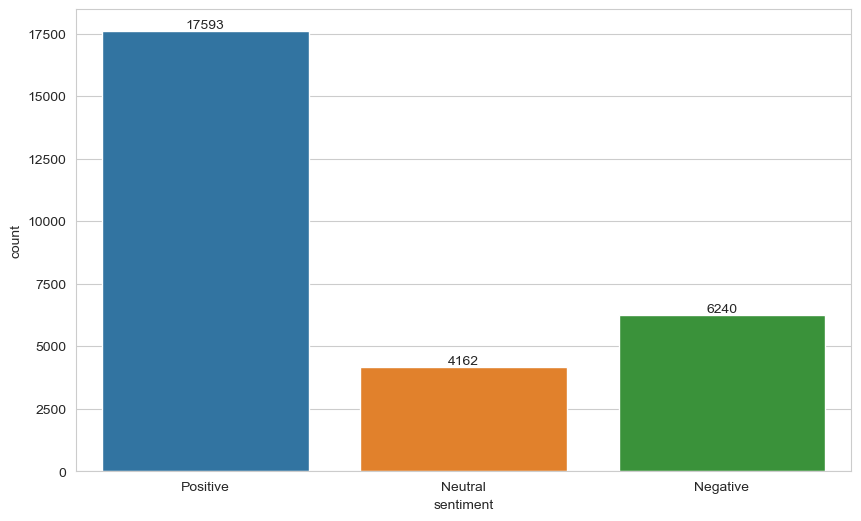

In [121]:
ax = sns.countplot(df2.sentiment);
for p in ax.containers:
    ax.bar_label(p)

> No irrelevant values

In [122]:
df2.sentiment_polarity.unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [123]:
df2.sentiment_polarity.sample(3)

App
HotelTonight: Book amazing deals at great hotels    0.217
Cut the Rope FULL FREE                             -0.070
Facebook Ads Manager                                0.600
Name: sentiment_polarity, dtype: float64

In [124]:
df2.sentiment_polarity.dtype

dtype('float64')

In [125]:
df2.sentiment_polarity.describe()

count   27995.000
mean        0.170
std         0.344
min        -1.000
25%         0.000
50%         0.140
75%         0.400
max         1.000
Name: sentiment_polarity, dtype: float64

> No irrelevant values

In [126]:
df2.sentiment_subjectivity.unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [127]:
df2.sentiment_subjectivity.describe()

count   27995.000
mean        0.484
std         0.261
min         0.000
25%         0.346
50%         0.502
75%         0.650
max         1.000
Name: sentiment_subjectivity, dtype: float64

> No irrelevant values

### Handling Missing Values

In [128]:
# 'Apps' data
df1.isnull().sum()

category             0
rating            1458
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       0
genres               0
last_updated         0
current_ver          8
android_ver          2
dtype: int64

In [129]:
# percentages of missing values
df1.isnull().sum() / df1.shape[0] * 100

category          0.000
rating           14.090
reviews           0.000
size              0.000
installs          0.000
type              0.010
price             0.000
content_rating    0.000
genres            0.000
last_updated      0.000
current_ver       0.077
android_ver       0.019
dtype: float64

> `Rating` column has `14%` missing values. Some other columns have minimal missing values.

In [130]:
# 'Reviews' data
df2.isnull().sum()

translated_review         2
sentiment                 1
sentiment_polarity        1
sentiment_subjectivity    1
dtype: int64

In [131]:
df2.isnull().sum().any()

True

> No null values

### Exporting cleaned dataset

In [132]:
# 'App' data
df1.to_csv("cleaned_apps.csv")

In [133]:
# 'Reviews' data
df2.to_csv("cleaned_reviews.csv")

### Loading cleaned data and handling missing values

In [134]:
# clean 'App' data
df1_clean = pd.read_csv("cleaned_apps.csv", index_col='App')
df1_clean.head()

,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159.000,19M,10000.000,Free,0.000,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.900,967.000,14M,500000.000,Free,0.000,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700,87510.000,8.7M,5000000.000,Free,0.000,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644.000,25M,50000000.000,Free,0.000,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967.000,2.8M,100000.000,Free,0.000,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [135]:
df1_clean.isnull().sum()

category             0
rating            1458
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       0
genres               0
last_updated         0
current_ver          8
android_ver          2
dtype: int64

In [136]:
# changing the null values in Rating column to 0
df1_clean.reviews.fillna(0)

App
Photo Editor & Candy Camera & Grid & ScrapBook          159.000
Coloring book moana                                     967.000
U Launcher Lite – FREE Live Cool Themes, Hide Apps    87510.000
Sketch - Draw & Paint                                215644.000
Pixel Draw - Number Art Coloring Book                   967.000
                                                        ...    
Sya9a Maroc - FR                                         38.000
Fr. Mike Schmitz Audio Teachings                          4.000
Parkinson Exercices FR                                    3.000
The SCP Foundation DB fr nn5n                           114.000
iHoroscope - 2018 Daily Horoscope & Astrology        398307.000
Name: reviews, Length: 10348, dtype: float64

In [137]:
df1_clean.reviews.isnull().sum().any()

False

In [138]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        10348 non-null  object 
 1   rating          8890 non-null   float64
 2   reviews         10348 non-null  float64
 3   size            10348 non-null  object 
 4   installs        10348 non-null  float64
 5   type            10347 non-null  object 
 6   price           10348 non-null  float64
 7   content_rating  10348 non-null  object 
 8   genres          10348 non-null  object 
 9   last_updated    10348 non-null  object 
 10  current_ver     10340 non-null  object 
 11  android_ver     10346 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.3+ MB


Deleting the rows with a null value for columns with datatype text or string (`type`, `curent_ver` and `android_ver`)

In [139]:
df1_clean.dropna(inplace=True)

In [140]:
df1_clean.isnull().sum().any()

False

> No null values

In [141]:
# clean 'Reviews' data
df2_clean = pd.read_csv("cleaned_reviews.csv", index_col='App')
df2_clean.head()

,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
App,,,,
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.000,0.533
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250,0.288
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.400,0.875
10 Best Foods for You,Best idea us,Positive,1.000,0.300


In [142]:
df2_clean.isnull().sum()

translated_review         2
sentiment                 1
sentiment_polarity        1
sentiment_subjectivity    1
dtype: int64

> No null values

### Exporting final data

In [143]:
df1_clean.to_csv("cleaned_apps_final.csv")

In [144]:
df2_clean.to_csv("cleaned_reviews_final.csv")

# End